In [3]:
import geopandas as gpd
import xarray as xr
import rioxarray as rxr
import numpy as np
import matplotlib.pyplot as plt
import os

In [40]:
era5_energy_only = xr.open_dataset('../data/etdata/ERA5_energy_only.nc')
era5_energy_only = era5_energy_only.rename({'latitude': 'y', 'longitude': 'x'})
# add crs to the data
era5_energy_only = era5_energy_only.rio.write_crs("epsg:4326")
# open ucrb boundary
ucrb = gpd.read_file('../data/geodata/Upper_Colorado_River_Basin_Boundary.json')
# clip era5 data to ucrb
era5_energy_only_clipped = era5_energy_only.rio.clip(ucrb.geometry, crs=ucrb.crs)
# sort by time
era5_energy_only_clipped = era5_energy_only_clipped.sortby('time')

In [41]:
# add days per month to the data
era5_energy_only_clipped['days_per_month'] = era5_energy_only_clipped.time.dt.days_in_month
# convert J/m2 to W/m2
era5_energy_only_clipped['ssr'] = era5_energy_only_clipped.ssr / (3600)
era5_energy_only_clipped['str'] = era5_energy_only_clipped.str / (3600)

In [42]:
era5_net = era5_energy_only_clipped.ssr + era5_energy_only_clipped.str
era5_net = era5_net.rename('net_radiation')
era5_net = era5_net.rio.write_crs("epsg:4326")

In [49]:
# energy only et 
rho = 1000
L = 2.5e6
era5_energy_only_clipped['et_ee'] = 0.8*86400*1000*(era5_energy_only_clipped.ssr + era5_energy_only_clipped.str) / (rho * L)
# save to netcdf
era5_energy_only_clipped.to_netcdf('../data/etdata/ERA5_energy_only_clipped.nc')

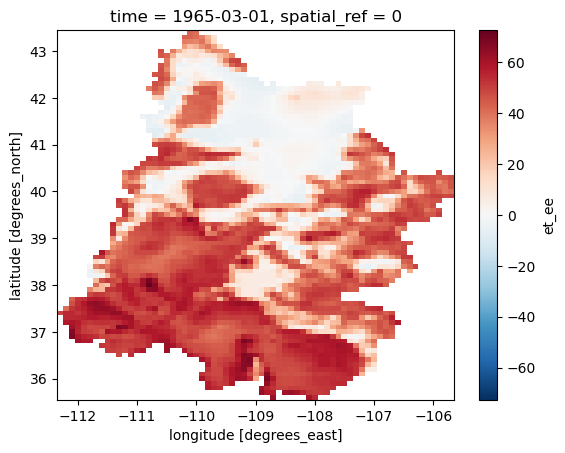